In [1]:
%matplotlib inline

In [2]:
import numpy as np
import helpy
import velocity

In [3]:
prefix = '/Users/zhejun/Document/Result/0810_single/result'

In [4]:
meta = helpy.load_meta(prefix)
boundary = meta.get('boundary')
x0,y0,R = boundary

In [96]:
data = helpy.load_data(prefix)

In [97]:
data['o'] = (data['o'] + np.pi)%(2 * np.pi)   # flip the detected orientation
tracksets = helpy.load_tracksets(data, run_track_orient=True, run_repair = 'interp')
track_prefix = {prefix: tracksets}
v_data = velocity.compile_noise(track_prefix, width=(0.575,), cat = False, side = sidelength, fps = 2.5, 
                           ring = True, x0= x0, y0 = y0, skip = 1, grad = False)
v_data = v_data[prefix]

In [7]:
sidelength = 38.0

In [98]:
fdata = helpy.load_framesets(v_data)

In [99]:
def data_filter(data, x0 , y0 , inner, outer):
    x = data['x']
    y = data['y']
    position = [x - x0, y - y0]
    distance = np.hypot(*position)
    legal = np.where((distance < outer) & (distance > inner))
    return legal

In [100]:
layer_number = 1

In [101]:
len(fdata.keys())

3000

In [102]:
order, vsring, frame, number, difference, vo = (list() for k in range(6))
r_density, ori_distr, order_distr, vpar= (np.empty(0) for k in range(4))
for f, framedata in fdata.iteritems():
    legal = data_filter(framedata, x0, y0, R - 55, R )
    length = len(legal[0])
    number.append(length)   # number in ring
    legal_data = framedata[legal]
    cen_orient = legal_data['corient']
    cor_orient = legal_data['o']
    vorient = legal_data['vo']
    cen_unit_vector = np.array([np.cos(cen_orient), np.sin(cen_orient)]).T
    cor_unit_vector = np.array([np.cos(cor_orient), np.sin(cor_orient)]).T
    ring_orient = - np.cross(cen_unit_vector, cor_unit_vector)
    clockwise = len(np.where(ring_orient > 0)[0])
    counter_clockwise = len(np.where(ring_orient < 0)[0])
    difference.append(clockwise - counter_clockwise)   # n+ - n-
    vring = legal_data['vring']
    frame.append(f)
    order.append(np.mean(ring_orient)/np.sin(np.pi/4))
    vsring.append(np.mean(vring))
    vo.append(np.mean(vorient))
    r_density = np.concatenate((r_density, framedata['r']))
    ori_distr = np.concatenate((ori_distr, legal_data['o'] % (2 * np.pi)))
    order_distr = np.concatenate((order_distr, ring_orient))
    vpar = np.concatenate((vpar, legal_data['vpar']))

In [103]:
number = np.array(number)

In [104]:
import matplotlib.pyplot as plt

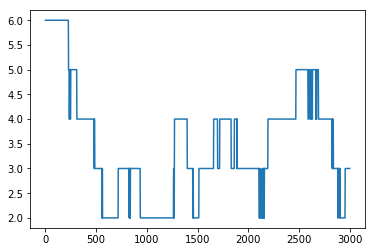

In [105]:
plt.plot(number)

In [106]:
number = np.array(number)

In [107]:
legal6 = np.where(number == 6)

In [108]:
len(legal6[0])

227

In [109]:
vsring = np.array(vsring)

In [110]:
v6 = vsring[legal6]

In [111]:
len(v6)

227

In [112]:
v6.std()

0.03286466

In [113]:
v6.mean()

0.010828962

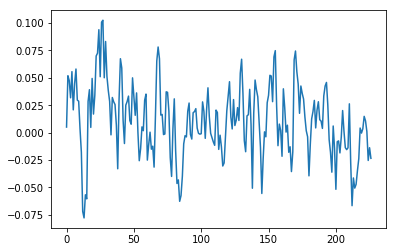

In [114]:
plt.plot(v6)

(array([  5.,   9.,  16.,  35.,  53.,  50.,  31.,  15.,  10.,   3.]),
 array([-0.07774358, -0.05971658, -0.04168958, -0.02366257, -0.00563557,
         0.01239143,  0.03041844,  0.04844544,  0.06647244,  0.08449945,
         0.10252645]),
 <a list of 10 Patch objects>)

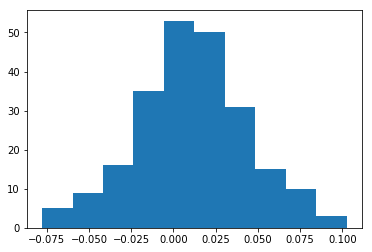

In [115]:
plt.hist(v6)

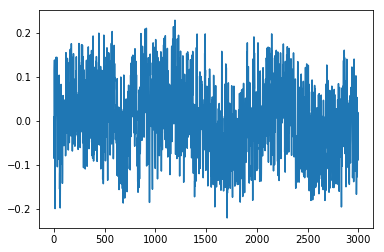

In [65]:
plt.plot(v_data[5]['vring'])

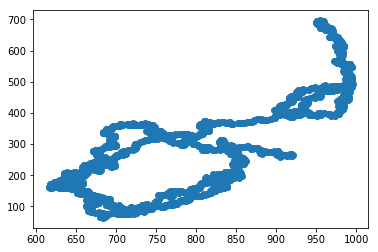

In [66]:
plt.scatter(v_data[5]['x'],v_data[5]['y'])

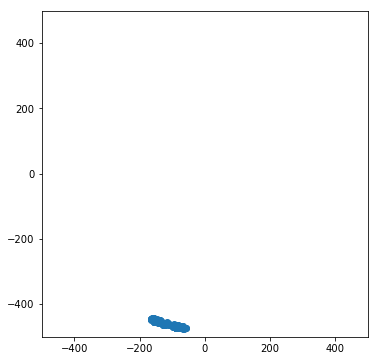

In [87]:
particle= 2
fig, axes = plt.subplots()
fig.set_size_inches(6,6)
#axes.quiver(v_data[3]['x'][:200]-x0,v_data[3]['y'][:200]-y0,
#            (v_data[3]['vring']*np.cos(v_data[3]['vorient']))[:200],(v_data[3]['vring']*np.sin(v_data[3]['vorient']))[:200])
axes.scatter(v_data[particle]['x'][:200]-x0,v_data[particle]['y'][:200]-y0)
axes.set_ylim([-500,500])
axes.set_xlim([-500,500])
axes.set_aspect('equal', adjustable='box')

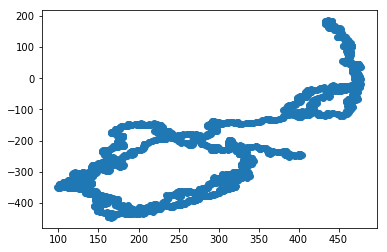

In [66]:
plt.scatter(v_data[5]['x']-x0,v_data[5]['y']-y0)

In [77]:
framenumber = 5
plotlength = 100

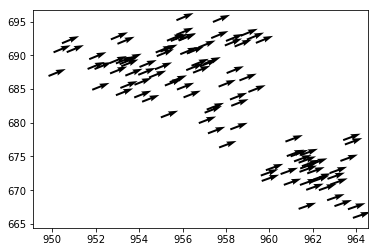

In [78]:
plt.quiver(v_data[framenumber]['x'][:plotlength],v_data[framenumber]['y'][:plotlength],np.cos(v_data[framenumber]['corient'])[:plotlength], np.sin(v_data[framenumber]['corient'])[:plotlength])

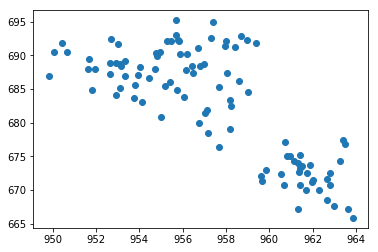

In [31]:
plt.scatter(v_data[framenumber]['x'][:plotlength],v_data[framenumber]['y'][:plotlength])

In [125]:
a = v_data[3]['corient'] - v_data[3]['vorient']

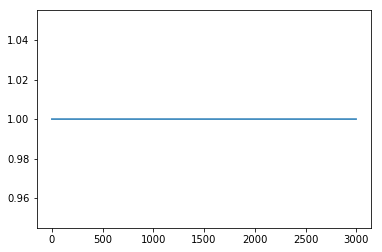

In [128]:
plt.plot(np.sin(a))

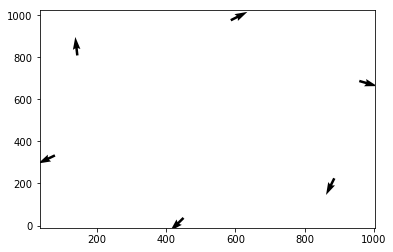

In [119]:
f = 20
plt.quiver(fdata[f]['x'],fdata[f]['y'],np.cos(fdata[f]['o']), np.sin(fdata[f]['o']))

In [88]:
fdata[1]

array([ (1, 0, 79.01300048828125, 344.9580078125, 0.454226016998291, 12.337074279785156, 3.5044236183166504, 1.9336271286010742, 0.26561230421066284, -0.01728248968720436, 0.010708721354603767, 0.016145478934049606, -0.01235656626522541),
       (1, 1, 148.8769989013672, 807.4749755859375, 5.418704986572266, 12.43895435333252, 2.464559316635132, 0.8937629461288452, -0.04279984161257744, 0.1481342613697052, 0.010592019185423851, 0.1010594591498375, 0.10882525891065598),
       (1, 2, 460.83599853515625, 37.66899871826172, 0.7089056968688965, 12.553503036499023, 4.593745231628418, 3.022948741912842, 0.1750931739807129, -0.13493016362190247, -0.05436068773269653, 0.12754717469215393, -0.06994964927434921),
       (1, 3, 564.9869995117188, 984.7789916992188, 3.9650356769561768, 12.521736145019531, 1.4704092741012573, 6.182798385620117, 0.025011366233229637, 0.04686789959669113, 0.017309416085481644, 0.04489721730351448, -0.02191929519176483),
       (1, 4, 896.4110107421875, 216.3410034179

In [90]:
fdata[1]['t']

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [91]:
fdata[1]['x']

array([  79.01300049,  148.8769989 ,  460.83599854,  564.98699951,
        896.41101074,  949.82397461], dtype=float32)

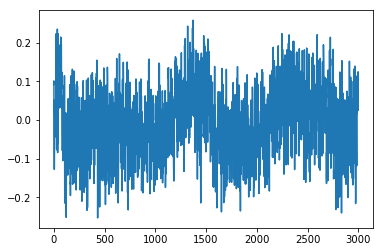

In [120]:
plt.plot(v_data[1]['vring'])

(array([  1.,   0.,   0.,   1.,   1.,   2.,   1.,   2.,   2.,   5.,   3.,
          4.,   4.,   6.,   2.,   5.,   9.,  11.,   5.,  11.,  11.,   7.,
          7.,   9.,   7.,   6.,   5.,   9.,   8.,   6.,   9.,   9.,   4.,
          7.,   7.,   8.,   4.,   5.,   4.,   3.,   2.,   3.,   1.,   2.,
          0.,   3.,   2.,   1.,   2.,   1.]),
 array([-0.25128436, -0.24156129, -0.23183822, -0.22211514, -0.21239207,
        -0.202669  , -0.19294593, -0.18322286, -0.17349978, -0.16377671,
        -0.15405364, -0.14433057, -0.1346075 , -0.12488442, -0.11516135,
        -0.10543828, -0.09571521, -0.08599214, -0.07626906, -0.06654599,
        -0.05682292, -0.04709985, -0.03737678, -0.0276537 , -0.01793063,
        -0.00820756,  0.00151551,  0.01123858,  0.02096166,  0.03068473,
         0.0404078 ,  0.05013087,  0.05985394,  0.06957702,  0.07930009,
         0.08902316,  0.09874623,  0.10846931,  0.11819238,  0.12791545,
         0.13763852,  0.14736159,  0.15708467,  0.16680774,  0.17653081,
 

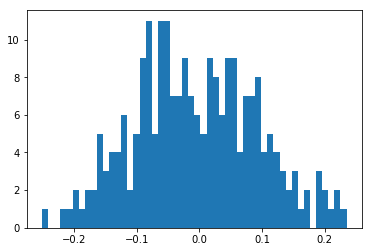

In [126]:
plt.hist(v_data[1][legal6]['vring'],50)

In [127]:
vs = np.empty(0)

In [128]:
for i in np.arange(6):
    vs = np.concatenate((v_data[i][legal6]['vring'],vs))

(array([  1.,   0.,   0.,   1.,   2.,   5.,   4.,   9.,   8.,  12.,  10.,
         22.,  24.,  20.,  20.,  23.,  32.,  39.,  36.,  41.,  53.,  39.,
         41.,  58.,  56.,  53.,  56.,  46.,  67.,  56.,  65.,  59.,  45.,
         49.,  47.,  39.,  33.,  35.,  42.,  22.,  26.,  14.,  15.,  15.,
          4.,   5.,   3.,   2.,   4.,   4.]),
 array([-0.25128436, -0.24156129, -0.23183822, -0.22211514, -0.21239207,
        -0.202669  , -0.19294593, -0.18322286, -0.17349978, -0.16377671,
        -0.15405364, -0.14433057, -0.1346075 , -0.12488442, -0.11516135,
        -0.10543828, -0.09571521, -0.08599214, -0.07626906, -0.06654599,
        -0.05682292, -0.04709985, -0.03737678, -0.0276537 , -0.01793063,
        -0.00820756,  0.00151551,  0.01123858,  0.02096166,  0.03068473,
         0.0404078 ,  0.05013087,  0.05985394,  0.06957702,  0.07930009,
         0.08902316,  0.09874623,  0.10846931,  0.11819238,  0.12791545,
         0.13763852,  0.14736159,  0.15708467,  0.16680774,  0.17653081,
 

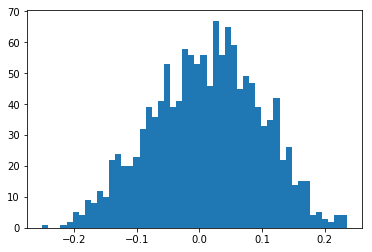

In [130]:
plt.hist(vs,50)